# New York City Landcover Analysis

### Introduction

New York City, also known as the concrete jungle, isn't well know for having much green in the city aside from central park. Using landsat imagery we can analyze the surface of NYC and determine how much of the city is concrete, and how much is greenery. 

To do this I'll use Normalized Difference Vegetation index (NDVI) to categorize the surfaces level colors into values.

<img src="ndvi.png" alt="Drawing" style="width: 500px;"/>

### Imports

In [2]:
pip install arcgis

Defaulting to user installation because normal site-packages is not writeable
  Using cached arcgis-2.0.0.tar.gz (3.7 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached keyring-21.7.0-py3-none-any.whl (32 kB)
  Using cached lerc-4.0.1-py3-none-any.whl (736 kB)
  Using cached python_certifi_win32-1.6.1-py2.py3-none-any.whl (7.3 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Using cached geomet-1.0.0-py3-none-any.whl (28 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached requests_toolbelt-0.10.1-py2.py3-none-any.whl (54 kB)
  Using cached requests_ntlm-1.2.0-py3-none-any.whl (6.0 kB)
  Using cached requests_gssapi-1.2.3-py2.py3-none-any.whl
  Using cached requests_negotiate_sspi-0.5.2-py2.py3-none-any.w

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
anaconda-client 1.11.1 requires urllib3>=1.26.4, but you have urllib3 1.25.11 which is incompatible.


In [2]:
import pandas as pd
from datetime import datetime
from IPython.display import Image
from IPython.display import HTML
import matplotlib.pyplot as plt
import arcgis
import sys
from arcgis.gis import GIS
from arcgis.raster.functions import apply, clip, remap, colormap
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry
from arcgis.geocoding import geocode
from arcgis.features import FeatureLayer
gis = GIS()
#nyc = gis.map('Dublin')
#nyc

In [3]:
landsat_item = gis.content.search('title:Multispectral Landsat', 'Imagery Layer', outside_org=True)[0]
landsat = landsat_item.layers[0]
landsat_item

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>

### Dublin spatial data from ny.gov


In [4]:
area = geocode("Dublin", out_sr=landsat.properties.spatialReference)[0]
landsat.extent = area['extent']

### Landsat image of Dublin

In [5]:
selected = landsat.filter_by(where="(Category = 1) AND (cloudcover <=0.05)",
                            time=[datetime(2020, 4, 1), datetime(2020, 6, 30)],
                             geometry=arcgis.geometry.filters.intersects(area['extent']))

df = selected.query(out_fields="AcquisitionDate, GroupName, CloudCover, DayOfYear",
                    order_by_fields="AcquisitionDate").sdf
df['AcquisitionDate'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df

,OBJECTID,AcquisitionDate,GroupName,CloudCover,DayOfYear,SHAPE
0,2978518,2020-05-29 11:16:11,LC08_L1TP_205023_20200529_20200820_02_T1_MTL,0.0184,23,"{""rings"": [[[-369077.6794999987, 7111461.2597]..."


In [6]:
nyc_image = landsat.filter_by('OBJECTID=2978518')

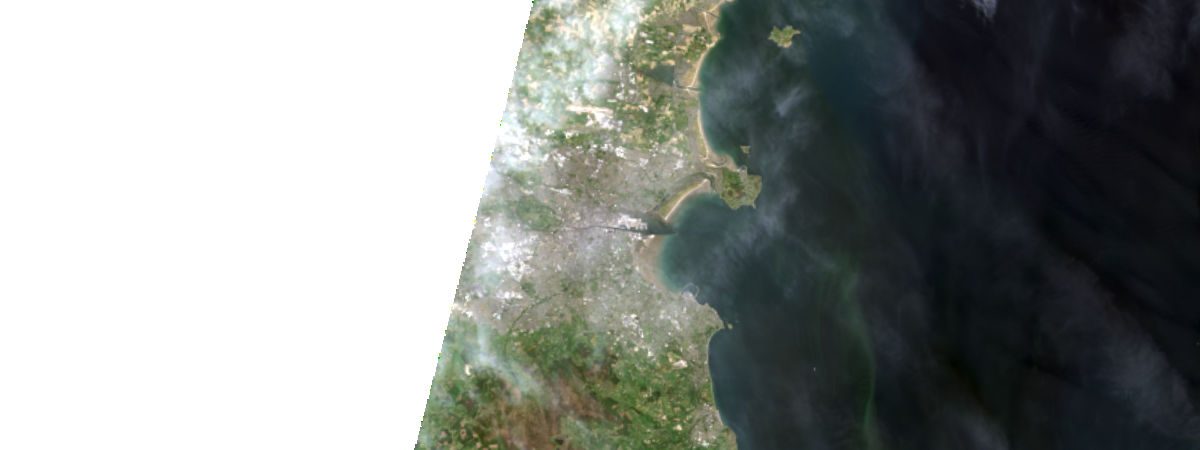

In [7]:
apply(nyc_image, 'Natural Color with DRA')

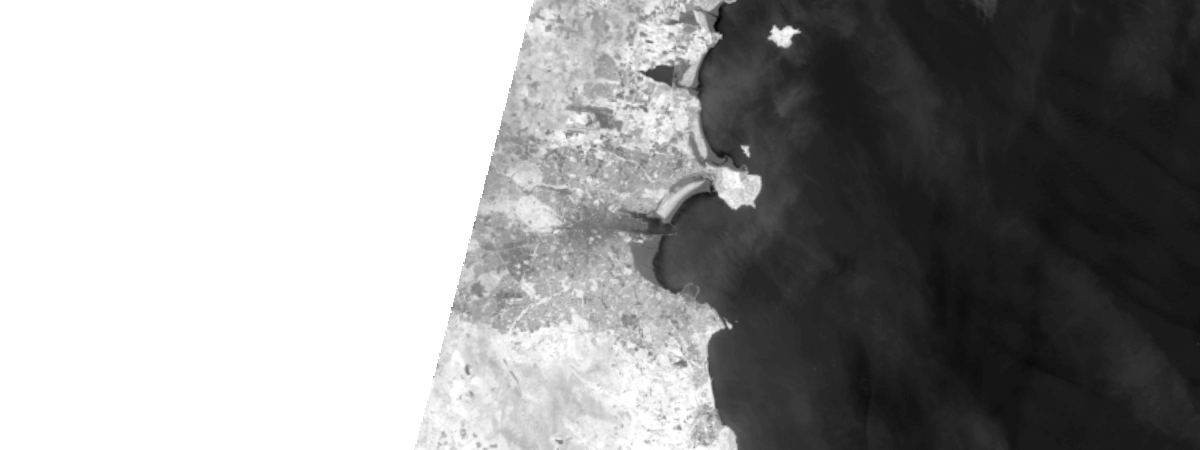

In [8]:
nyc_colorized = apply(nyc_image, 'NDVI Raw')
nyc_colorized

### Dublin clip of just city boundaries

In [71]:
nyc_clip1=nyc_colorized

### NYC clip of just city boundaries

In [27]:
nyc_fl = FeatureLayer('https://services-eu1.arcgis.com/FH5XCsx8rYXqnjF5/arcgis/rest/services/Counties___OSi_National_Statutory_Boundaries/FeatureServer/0')
nyc_fl

<FeatureLayer url:"https://services-eu1.arcgis.com/FH5XCsx8rYXqnjF5/arcgis/rest/services/Counties___OSi_National_Statutory_Boundaries/FeatureServer/0">

In [38]:
nyc_df = nyc_fl.query(where='OBJECTID=5')

In [39]:
nyc_df.sdf

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,Shape__Area,Shape__Length,SHAPE
0,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,9.257609e+08,366198.612466,"{""rings"": [[[703019.336, 739044.539999999], [7..."


In [40]:
display(nyc_df.sdf)

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,Shape__Area,Shape__Length,SHAPE
0,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,9.257609e+08,366198.612466,"{""rings"": [[[703019.336, 739044.539999999], [7..."


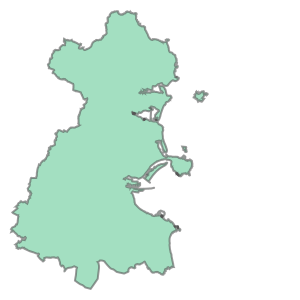

In [51]:
nyc_poly = nyc_df.sdf.SHAPE[0]
type(nyc_poly)
display(nyc_poly)

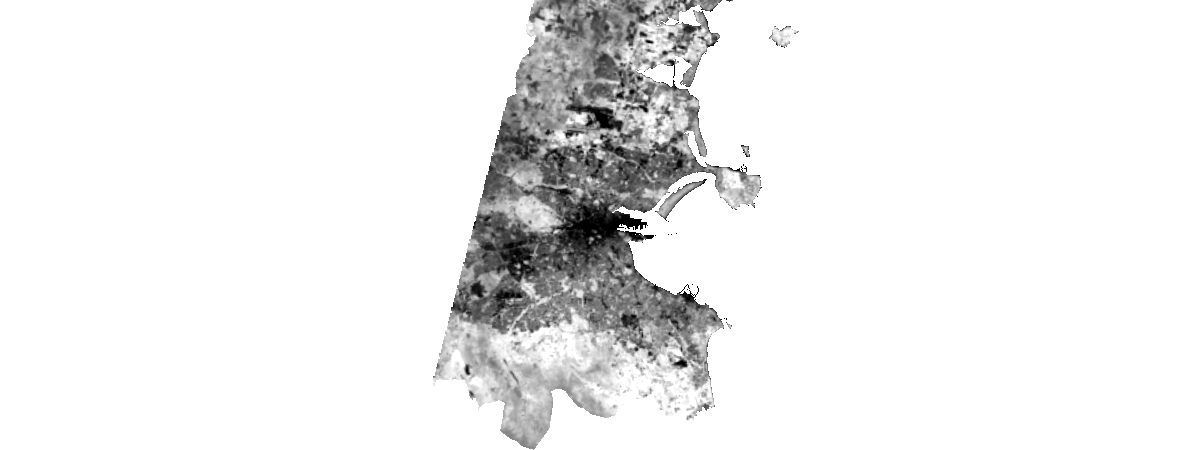

In [62]:
nyc_clip = clip(nyc_colorized,nyc_poly)
nyc_clip.extent = area['extent']
nyc_clip

In [72]:
nyc_clip1=nyc_clip1

### NDVI color mask

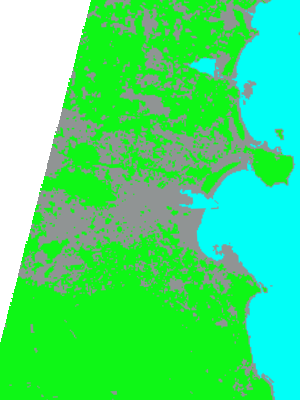

In [82]:

masked = colormap(remap(nyc_clip1, 
                        input_ranges=[-1,0,     # water
                                     -0.1, 0.4, # Concrete
                                     0.4, 1],   # Vegetation, Trees      
                        output_values=[1, 2, 3]),
                        colormap=[[1, 1, 255, 248], [2, 144, 148, 148], [3,14,247,22]], astype='u8')

Image(masked.export_image(bbox=area['extent'], size=[300,450], f='image'))

### Landcover Analysis

In [80]:
xpixel = (nyc_clip1.extent['xmax'] - nyc_clip1.extent['xmin']) / 800
ypixel = (nyc_clip1.extent['ymax'] - nyc_clip1.extent['ymin']) / 450

full_res = masked.compute_histograms(nyc_clip1.extent,
                                   pixel_size={'x':xpixel, 'y': ypixel})
total_pix = 0
hist = full_res['histograms'][0]['counts'][0:]
for x in hist[1:]:
    total_pix += x
hist

[0, 41794, 97580, 194399]

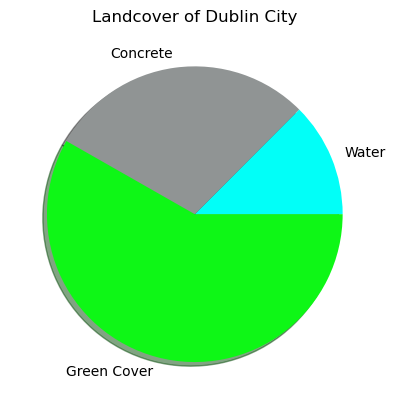

In [81]:
colors=['#0EF716','#01FFF8','#909494']
labels =[ (hist[1]/sum(hist)), (hist[2]/sum(hist)), (hist[3]/sum(hist)) ]
plt.pie(hist, labels=['', 'Water', 'Concrete', 'Green Cover'],colors=colors,
        shadow=True)
plt.title('Landcover of Dublin City')
plt.show()

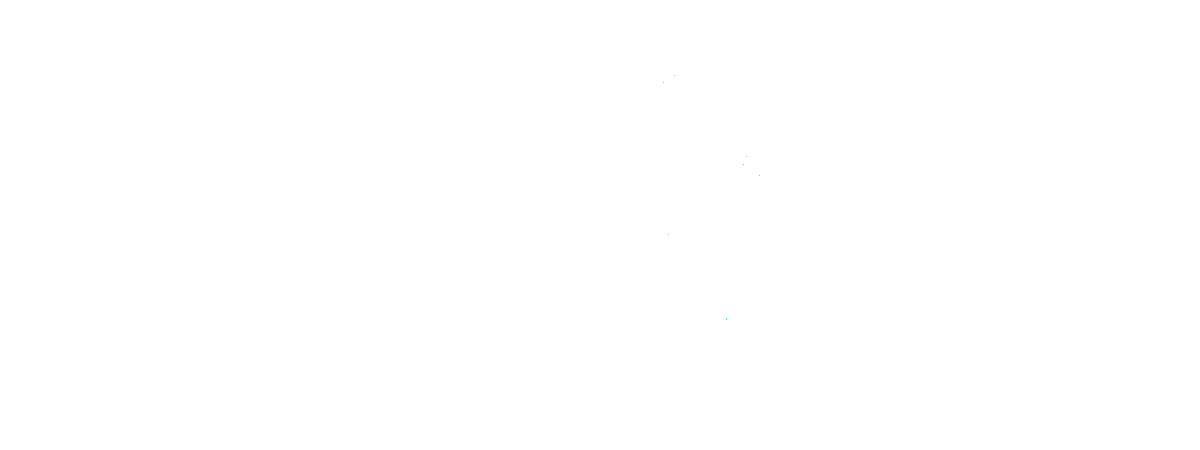

In [59]:
#map varient1
masked_water = colormap(remap(nyc_clip1, 
                        input_ranges=[-1,0,     # water
                                     -0.1, 0.4, # Concrete
                                     0.4, 1],   # Vegetation, Trees      
                        output_values=[1, 2, 3]),
                        colormap=[[1, 1, 255, 248], [2, 255, 255, 255], [3,255,255,255]], astype='u8')

Image(masked_water.export_image(bbox=area['extent'], size=[1200,450], f='image'))

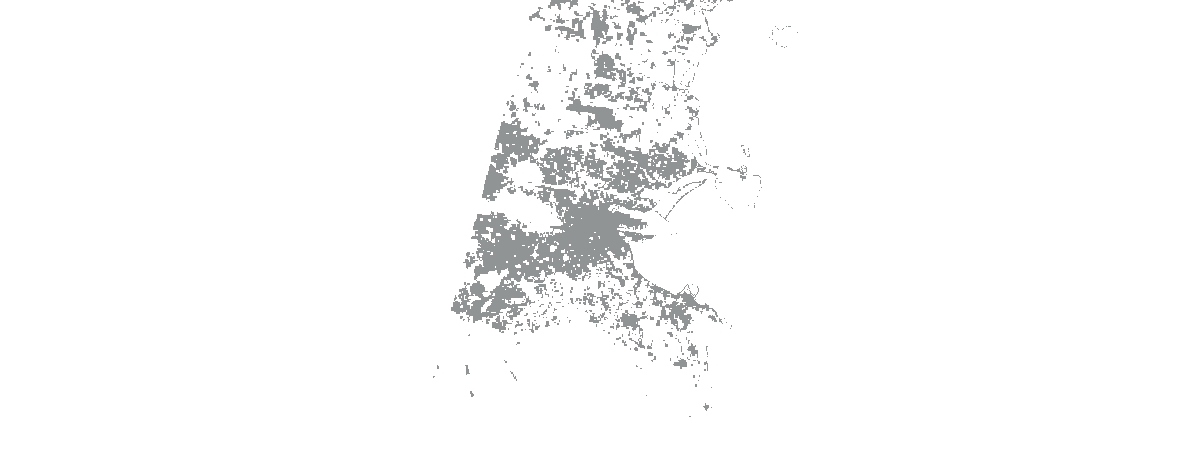

In [60]:
#map varient2
masked_concrete = colormap(remap(nyc_clip1, 
                        input_ranges=[-1,0,     # water
                                     -0.1, 0.4, # Concrete
                                     0.4, 1],   # Vegetation, Trees      
                        output_values=[1, 2, 3]),
                        colormap=[[1, 255, 255, 255], [2, 144, 148, 148], [3,255,255,255]], astype='u8')

Image(masked_concrete.export_image(bbox=area['extent'], size=[1200,450], f='image'))

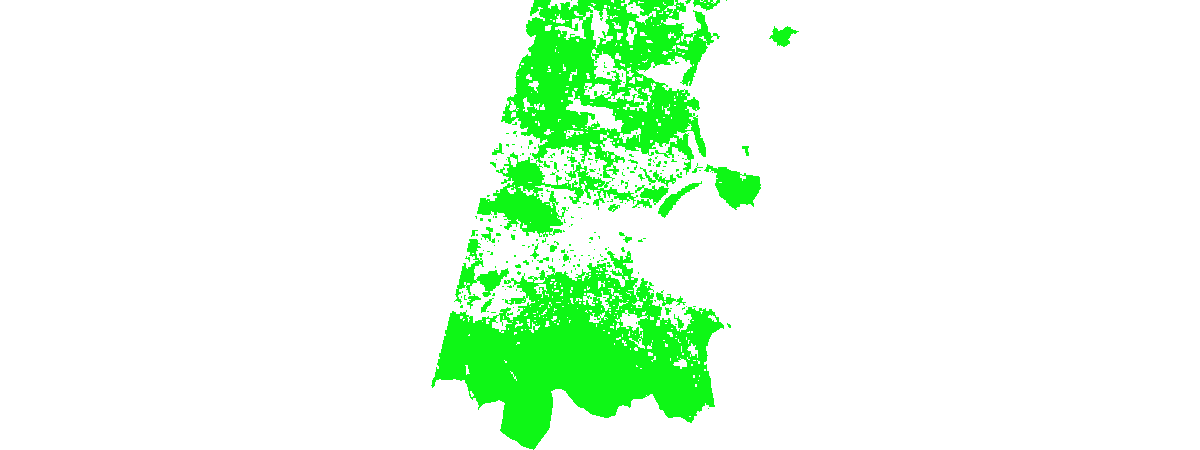

In [61]:
#map varient3
masked_green = colormap(remap(nyc_clip1, 
                        input_ranges=[-1,0,     # water
                                     -0.1, 0.4, # Concrete
                                     0.4, 1],   # Vegetation, Trees      
                        output_values=[1, 2, 3]),
                        colormap=[[1, 255, 255, 255], [2, 255, 255, 255], [3,14,247,22]], astype='u8')

Image(masked_green.export_image(bbox=area['extent'], size=[1200,450], f='image'))

In [2]:
import arcpy
from arcpy.ia import *


# Set input raster
in_raster = arcpy.Raster("D:\c\jaipur_2\L1C_T43REK_A028016_20220718T054109.tif")



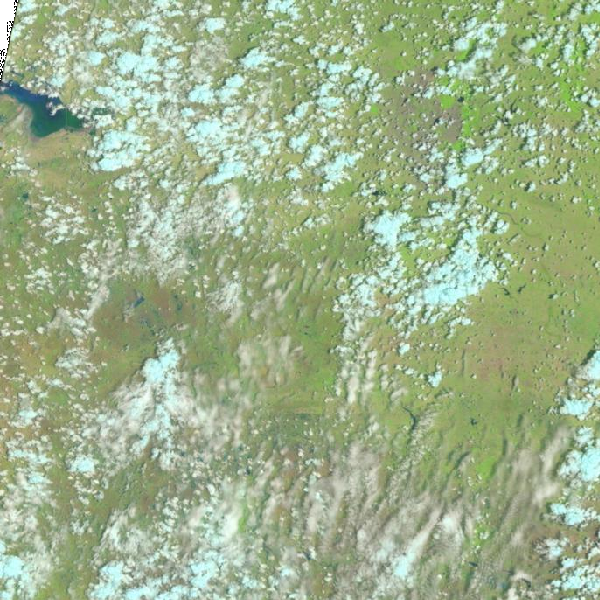

In [4]:
in_raster

In [6]:
import pandas as pd
from datetime import datetime
from IPython.display import Image
from IPython.display import HTML
import matplotlib.pyplot as plt
import arcgis
import sys
from arcgis.gis import GIS
from arcgis.raster.functions import apply, clip, remap, colormap
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry
from arcgis.geocoding import geocode
from arcgis.features import FeatureLayer

In [9]:
apply(in_raster, 'NDVI Raw')

TypeError: can't pickle Raster objects